In [1]:
from repositories import retrieve_metadata
from assess import assess

/Users/anadrmic/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
keywords=[]
repository_choice="1"

In [3]:
metadata_list, request_status, url = retrieve_metadata(repository_choice, keywords)

Fetching ArrayExpress metadata...
No keywords provided. Fetching all metadata...
API Call: https://www.ebi.ac.uk/biostudies/api/v1/search?pageSize=500
E-MTAB-5336
E-MTAB-7172
E-MTAB-7171
E-MTAB-5335
E-MTAB-5334
Total Study IDs retrieved: 5


Fetching AE:   0%|          | 0/1 [00:00<?, ?batch/s]

API Call: https://www.ebi.ac.uk/biostudies/api/v1/search?pageSize=500&retstart=0
E-MTAB-5336
E-MTAB-7172
E-MTAB-7171
E-MTAB-5335
E-MTAB-5334
API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-MTAB-5336,E-MTAB-7172,E-MTAB-7171,E-MTAB-5335,E-MTAB-5334
API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-MTAB-5336,E-MTAB-7172,E-MTAB-7171,E-MTAB-5335,E-MTAB-5334
API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-MTAB-5336,E-MTAB-7172,E-MTAB-7171,E-MTAB-5335,E-MTAB-5334


Fetching AE:   0%|          | 0/1 [00:07<?, ?batch/s]


API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-MTAB-5336,E-MTAB-7172,E-MTAB-7171,E-MTAB-5335,E-MTAB-5334


ERROR:root:Error fetching summary for IDs ['E-MTAB-5336', 'E-MTAB-7172', 'E-MTAB-7171', 'E-MTAB-5335', 'E-MTAB-5334']: 404 Client Error:  for url: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-MTAB-5336,E-MTAB-7172,E-MTAB-7171,E-MTAB-5335,E-MTAB-5334


API Call: https://www.ebi.ac.uk/biostudies/api/v1/studies/E-MTAB-5336,E-MTAB-7172,E-MTAB-7171,E-MTAB-5335,E-MTAB-5334


KeyboardInterrupt: 

In [4]:
metadata_list

[{'data': {'data_format': 'TSV',
   'access': 'controlled',
   'file_name': 'TARGET-AML.5904b65c-e712-4f9c-b163-cf5bba5189c1.star_fusion.rna_fusion.tsv',
   'submitter_id': '15013bbf-841d-466c-8406-6efe3fc0e84a',
   'data_category': 'Structural Variation',
   'acl': ['phs000218', 'phs000465'],
   'type': 'structural_variation',
   'platform': 'Illumina',
   'file_size': 780,
   'created_datetime': '2022-07-08T07:55:08.544108-05:00',
   'md5sum': '4639577a3d74457b52b6527a1f3764da',
   'updated_datetime': '2024-07-29T13:25:41.160784-05:00',
   'file_id': '65087f06-5ab3-4eb0-b9df-752dadd4fbe2',
   'data_type': 'Transcript Fusion',
   'state': 'released',
   'experimental_strategy': 'RNA-Seq',
   'version': '1',
   'data_release': '35.0 - 41.0'},
  'warnings': {}},
 {'data': {'data_format': 'TSV',
   'access': 'open',
   'file_name': '63ab7e0b-7264-4cde-a35d-94c30ec3942e.mirnaseq.isoforms.quantification.txt',
   'submitter_id': '7f115586-7be0-4f65-b075-4cc6f6888a34',
   'data_category': 'T

______________________________________________________________________________________________________________
Principle: F1
Description: Findability: DOI presence in webpage
Score: 1
Explanation: The data source has a valid DOI associated with it available at re3data: ['10.25504/FAIRsharing.RyVjoS', '10.17616/R39645', '10.17616/R3D'].
______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
Principle: F2
Description: Findability: Keyword search in metadata
Score: 1.0
Explanation: 100.00% of entities have all required fields (10 out of 10).
0.00% of entities are missing some required fields (0 out of 10).

Breakdown of missing fields:
0 entities are missing 'data_category' field.
0 entities are missing 'data_type' field.
0 entities are missing 'data_release' field.
___________________________________________________________

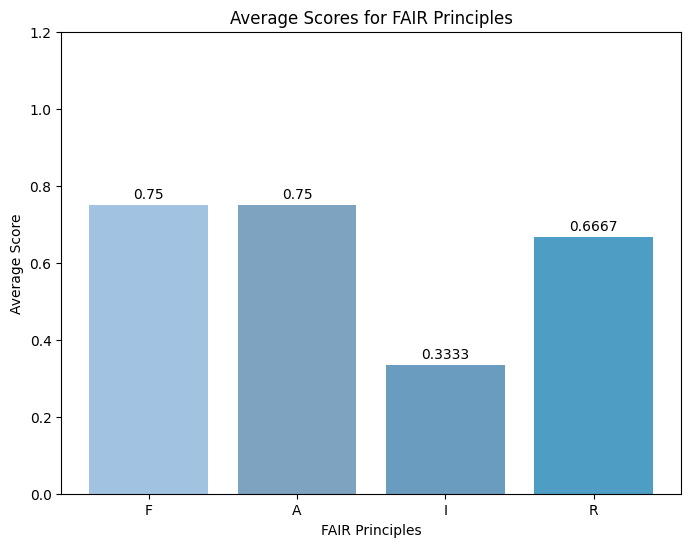

In [5]:
scores = assess(metadata_list, keywords, repository_choice, url, request_status)

In [6]:
import requests
from bs4 import BeautifulSoup

def check_re3data_license(repo_url):
    # Send a GET request to fetch the HTML content of the repository page
    response = requests.get(repo_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all the icons in the upper-right corner (where the license and other info are)
        # These are generally within <img> tags with alt attributes
        icons = soup.find_all('img', alt=True)

        # Loop through the icons and check if any of the alt text contains "License"
        for icon in icons:
            alt_text = icon['alt'].lower()
            if 'license' in alt_text:
                return 1  # License found, return 1
        
        return 0  # No license found
    else:
        print(f"Error: Unable to access {repo_url}. Status code: {response.status_code}")
        return 0  # Return 0 if unable to fetch the page

# Example usage:
repo_url = "https://www.re3data.org/repository/r3d100010222"
result = check_re3data_license(repo_url)
print(f"License found: {result}")


License found: 1


In [7]:
import json

def load_json_blocks(file_path):
    blocks = []
    with open(file_path, 'r') as file:
        content = file.read()
        
        json_blocks = content.split('}\n{')
        
        for i, block in enumerate(json_blocks):
            if i == 0:
                block += '}'
            elif i == len(json_blocks) - 1:
                block = '{' + block
            else:
                block = '{' + block + '}'
            
            blocks.append(json.loads(block))
    
    return blocks

metadata_list = load_json_blocks('/Users/anadrmic/Downloads/geto3/metadata/gwas.txt')

In [8]:
len(metadata_list)

99497